In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv('/content/cleaned data.csv', encoding='latin1')
data.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,384.811147,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,1131.464935,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,566.472247,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,529.881344,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,138.130879,Medsize


***DESCRIPTION ABOUT THE DATASET***

The dataset consists of information on customer lifetime value of an auto insurance company in the United States. It contains 9134 records of individuals residing in  US. It also includes over 16 features, encompassing of both personal information and details related to their auto insurance.

In [ ]:
print("The number of rows:",data.shape[0])
print("The number of columns:",data.shape[1])

The number of rows: 9134
The number of columns: 16


***CHECKING FOR THE NULL VALUES***

We start by checking for null values in the dataset. It is essential to check for null values as they have the ability to skew the results and/or cause errors by affecting the statistical calculations like mean, median, mode, standard deviation etc

In [ ]:
#checking for null values
data.isnull().sum()

Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
Vehicle Size                     0
dtype: int64

***NUMERICAL DATA***

We then select the columns containing numerical values. We also drop the columns containing no. of policies and no. of open complaints as it doesn't add much value and are superfluous.

In [ ]:
#descriptive statistics of data
numerical_cols = data.select_dtypes(include=["int64","float64"])
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)
numerical_cols.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


***EXPLORATORY DATA ANALYSIS***

***TARGET VARIABLE ANALYSIS***

Customer lifetime value is our target variable as we aim to predict it.

***DISTRIBUTION***

<ipython-input-65-2cc5c20cb7fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Customer Lifetime Value"])


<Axes: xlabel='Customer Lifetime Value', ylabel='Density'>

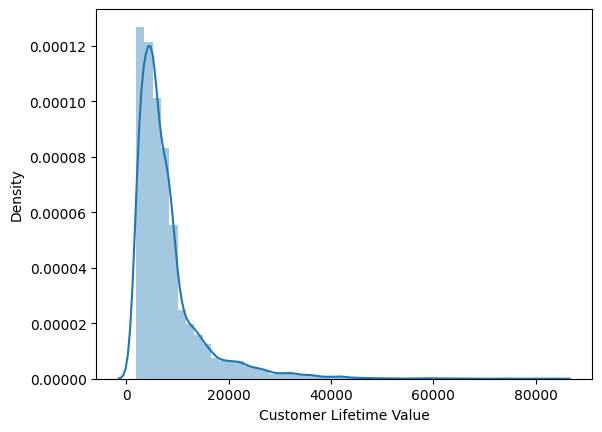

In [ ]:
sns.distplot(data["Customer Lifetime Value"])

The above distribution is positively skewed. It indicates that majority of individuals have lower customer lifetime value as they are clustered around the lower end. On the other hand, there is a small group of individuals at the right tail, or the upper end having high customer lifetime value.

***BOXPLOT***

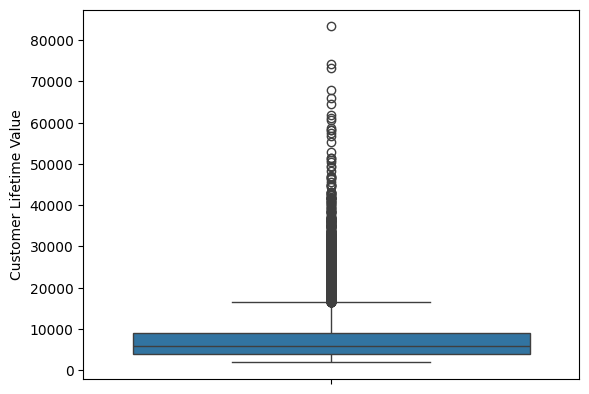

In [ ]:
sns.boxplot(data["Customer Lifetime Value"])
plt.show()

The boxplot indicates that there are lot of outliers present. It can be due to dramatically high value customers contributing to customer lifetime value.

***VALUE OF SKEWNESS***

In [ ]:
data["Customer Lifetime Value"].skew()

3.0322802599299847

The value is postive and the magnitude is high, reflecting a highly right skewed data.

***INCOME***

***DISTRIBUTION***

<ipython-input-68-fe038138d481>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Income"])


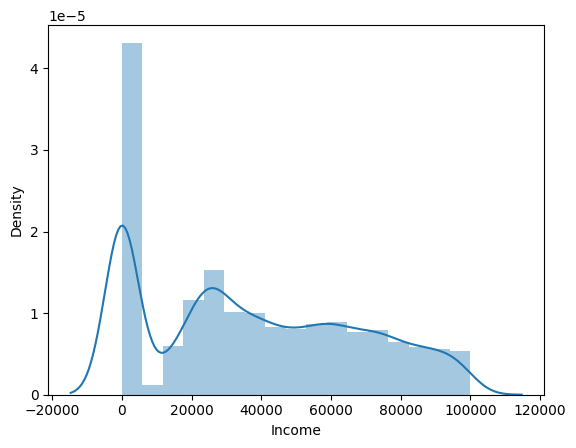

In [ ]:
sns.distplot(data["Income"])
plt.show()

It is right skewed meaning most individuals have low or moderate income and few have high income.

***BOXPLOT***

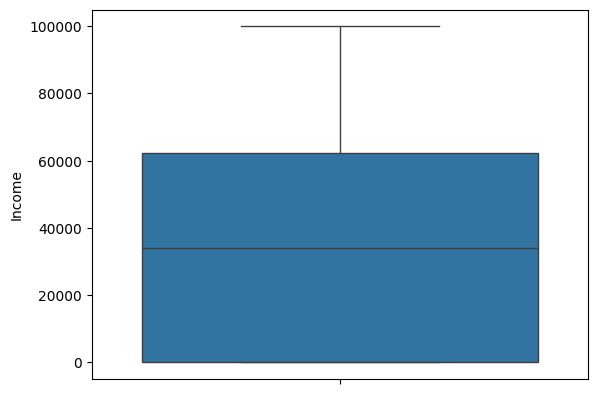

In [ ]:
sns.boxplot(data["Income"])
plt.show()

Though the there are outliers present, they are not in big numbers as the income is spread over a certain range.

***BIVARIATE ANALYSIS***

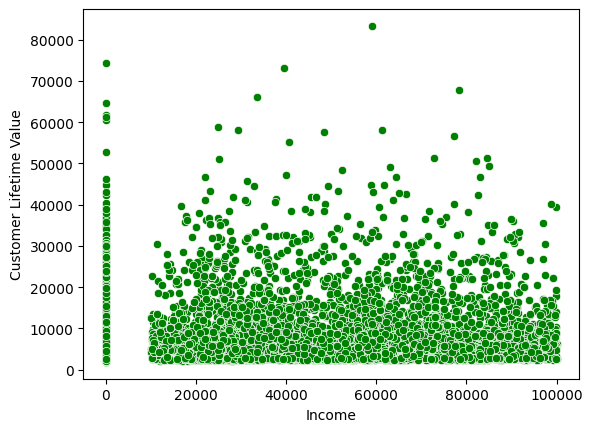

In [ ]:
sns.scatterplot(x="Income", y="Customer Lifetime Value", data=data, color='g')
# plt.savefig("bi.png")
plt.show()

It can be seen that there is no linear relationship between income and customer lifetime value.

***Monthly Premium Auto***

***DISTRIBUTION***

<ipython-input-71-dc929a2d8988>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Monthly Premium Auto"])


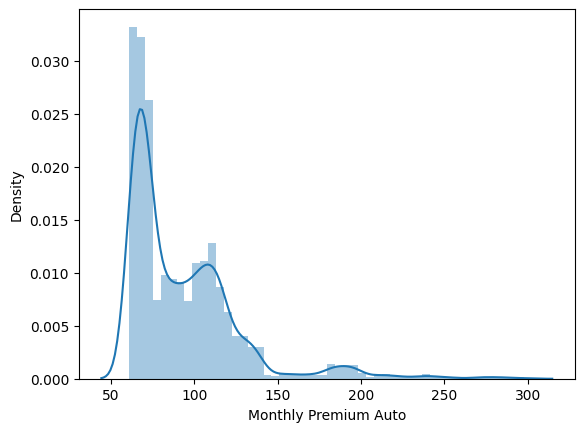

In [ ]:
sns.distplot(data["Monthly Premium Auto"])
plt.show()

It is right skewed as most pay lower to moderate auto premium.

***BOXPLOT***

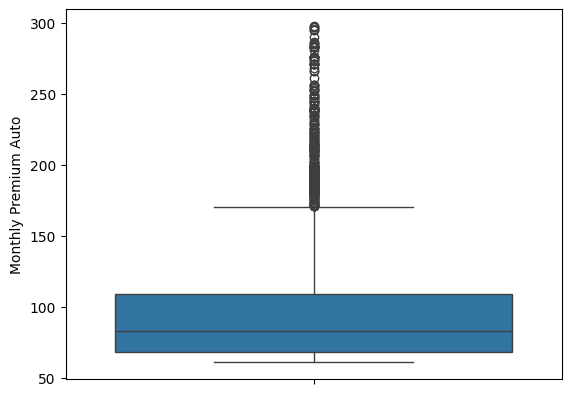

In [ ]:
sns.boxplot(data["Monthly Premium Auto"])
plt.show()

Outliers pay signifiicantly high auto preimum.

***BIVARIATE ANALYSIS***

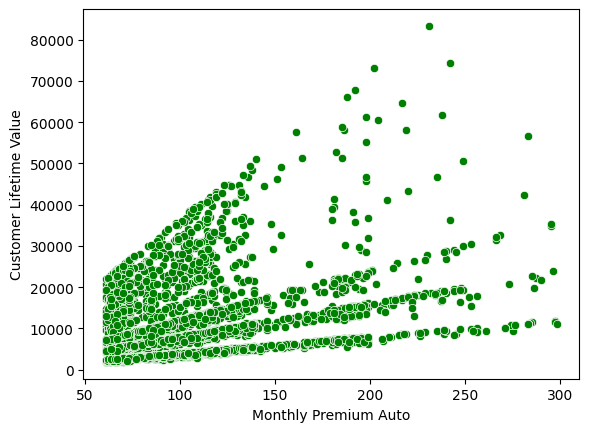

In [ ]:
sns.scatterplot(x="Monthly Premium Auto", y="Customer Lifetime Value", data=data, color='g')
plt.show()

There is linear relationship between monthly auto preimum and clv. It shows a positive correlation.

***TOTAL CLAIM AMOUNT***

 ***DISTRIBUTION***

<ipython-input-74-b0f824463498>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Total Claim Amount"])


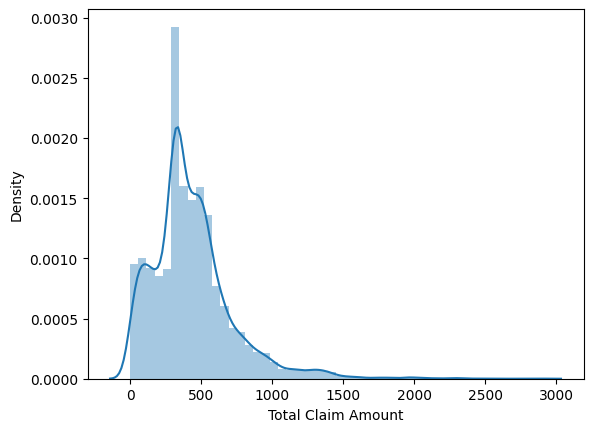

In [ ]:
sns.distplot(data["Total Claim Amount"])
plt.show()

It is positively skewed indicating that there are more claims at the lower end than on the upper end.

***BOXPLOT***

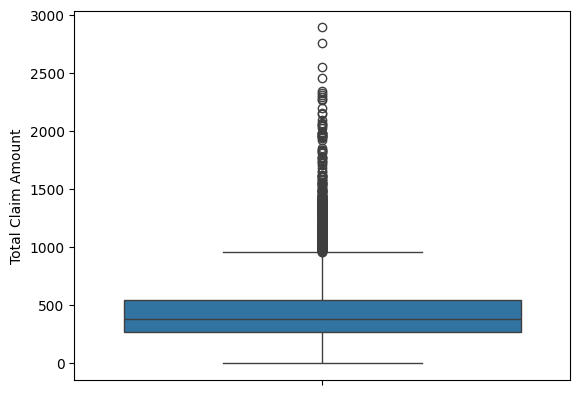

In [ ]:
sns.boxplot(data["Total Claim Amount"])
plt.show()

It can be seen that there are numerous no.s of outliers suggesting that there are high value claims which do not lie on typical range.


***BIVARIATE ANALYSIS***

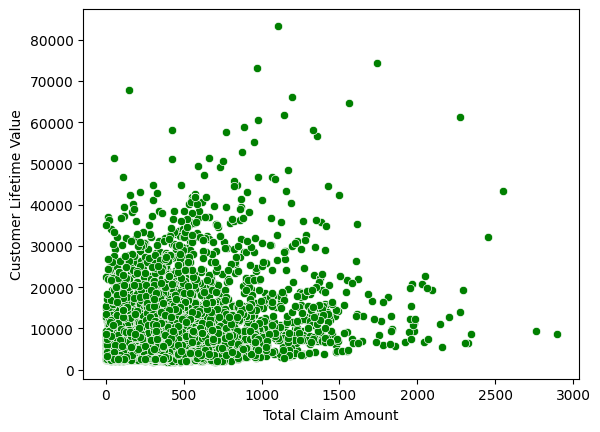

In [ ]:
sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", data=data, color='g')
plt.show()

There is a no linear relationship between CLV and Total Claim Amount.

 ***Months Since Last Claim***

***DISTRIBUTION***

<ipython-input-77-8a9ca3dd0e6f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Months Since Last Claim"])


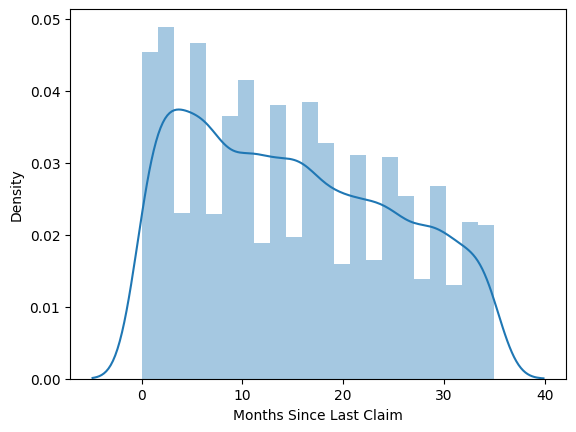

In [ ]:
sns.distplot(data["Months Since Last Claim"])
plt.show()

Distribution seems to be right-skewed suggesting that there are more recent claims, with the tail extending towards higher no. of months.


***BOXPLOT***

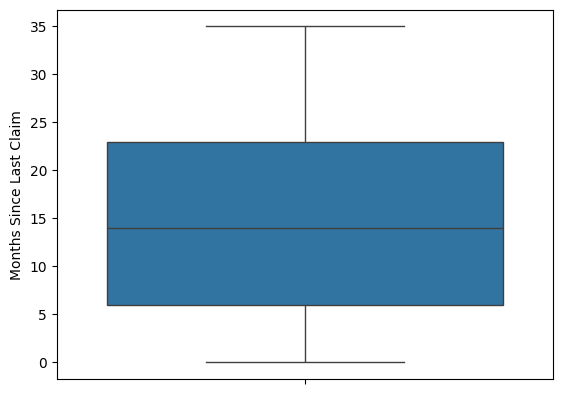

In [ ]:
sns.boxplot(data["Months Since Last Claim"])
plt.show()


It can be seen that most claims occurs during a certain range. Outliers indicate that are the claims are very recent or very old.

***BIVARIATE ANALYSIS***

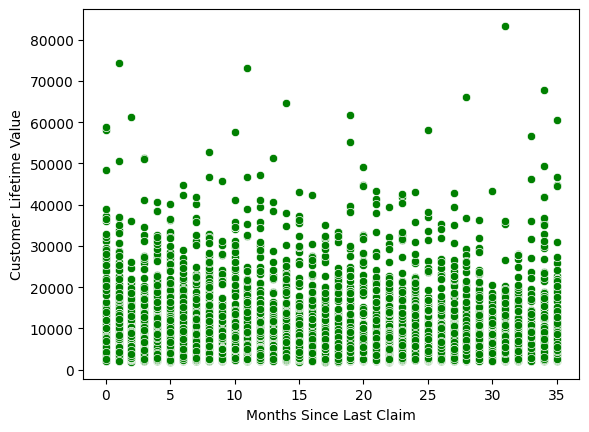

In [ ]:
sns.scatterplot(x="Months Since Last Claim", y="Customer Lifetime Value", data=data, color='g')
plt.show()

There is no correlation between CLV and months since last claim.

***Months Since Policy Inception***

***DISTRIBUTION***

<ipython-input-80-2cd828fb550b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Months Since Policy Inception"])


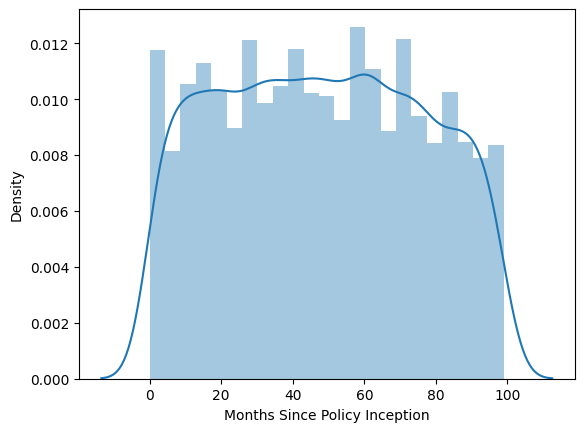

In [ ]:
sns.distplot(data["Months Since Policy Inception"])
plt.show()

The distribution seems relatively uniform with occasional spikes.

***BOXPLOT***

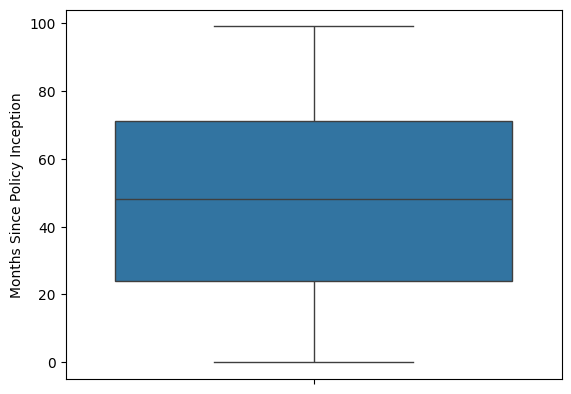

In [ ]:
sns.boxplot(data["Months Since Policy Inception"])
plt.show()


This reveals that some policies have been active for significantly longer or shorter than most.

***BIVARIATE ANALYSIS***

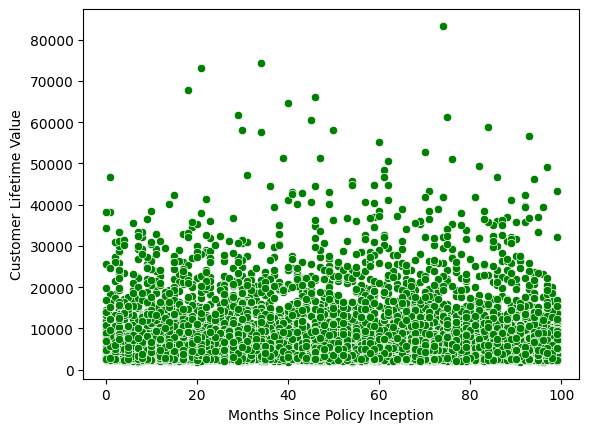

In [ ]:
sns.scatterplot(x="Months Since Policy Inception", y="Customer Lifetime Value", data=data, color='g')
plt.show()

There is no correlation between months since policy inception and customer lifetime value.

# ***CATEGORICAL VARIABLES***

In [ ]:
cat_cols = data.select_dtypes(include="object")
no_col = data[["Number of Open Complaints","Number of Policies"]]
cat_cols = pd.concat([cat_cols,no_col],axis=1)
cat_cols.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Vehicle Size,Number of Open Complaints,Number of Policies
0,No,Basic,Bachelor,Employed,F,Suburban,Married,Medsize,0,1
1,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Medsize,0,8
2,No,Premium,Bachelor,Employed,F,Suburban,Married,Medsize,0,2
3,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Medsize,0,7
4,No,Basic,Bachelor,Employed,M,Rural,Single,Medsize,0,1


Now the above dataframe contains all the categorial columns along with numerical columns "Number of Open Complaints" and "Number of Policies". We include the two numerical columns because they are representing discrete, countable categories making it beneficial for them to be in categorical variables.

In [ ]:

for i in cat_cols:
    print("Unique values in",str(i),"is",data[i].nunique())
    print(data[i].value_counts())
    print("-----------------------------------------")

Unique values in Response is 2
Response
No     7826
Yes    1308
Name: count, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
-----------------------------------------
Unique values in Education is 5
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
-----------------------------------------
Unique values in EmploymentStatus is 5
EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64
-----------------------------------------
Unique values in Gender is 2
Gender
F    4658
M    4476
Name: count, dtype: int64
-----------------------------------------
Unique values in Location Code is 3
Location Code
Suburban    5779
Rural       1773
Urban       

Summary of the unique values and their counts for each column.

# ***RESPONSE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

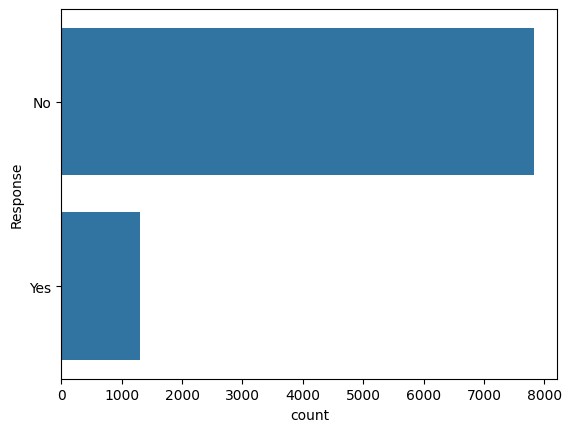

In [ ]:
sns.countplot(data["Response"])
plt.show()

High no. of responses indicating "no" suggests that people aren't willing to take another insurance contract. This could be worrisome for the company. The comapny should address the issues faced by the customers and work on customer satisfaction.

# ***COVERAGE***

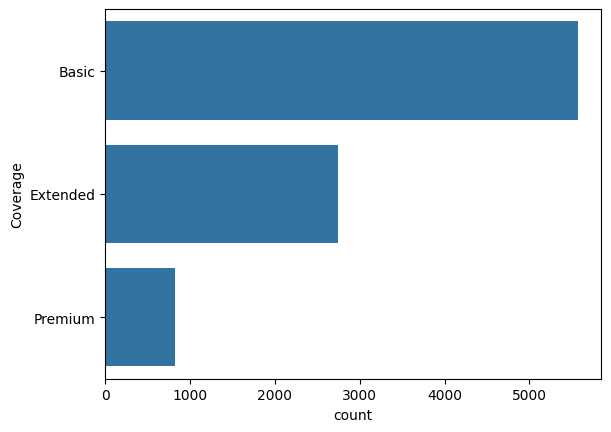

In [ ]:
sns.countplot(data["Coverage"])
plt.show()

Here we can see that most people prefer basic followed by extended withpremium being the least preffered option. This can be due to various reason, but the most common one is that basics costs less compared to other two.


# ***EDUCATION***

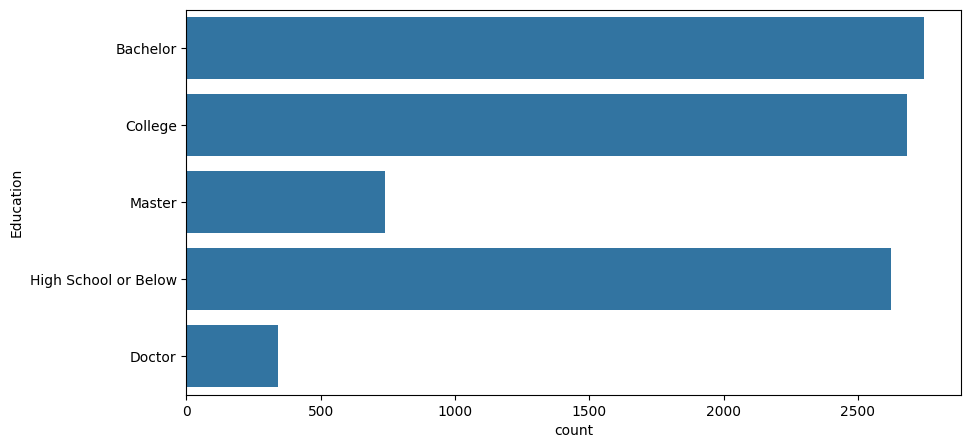

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data["Education"])
plt.show()

Most of the customers are either in the high school, college or are graduates
suggesting that they should be targeted more than those who are pursuing masters or doctrate.

# ***EMPLOYMENT STATUS***

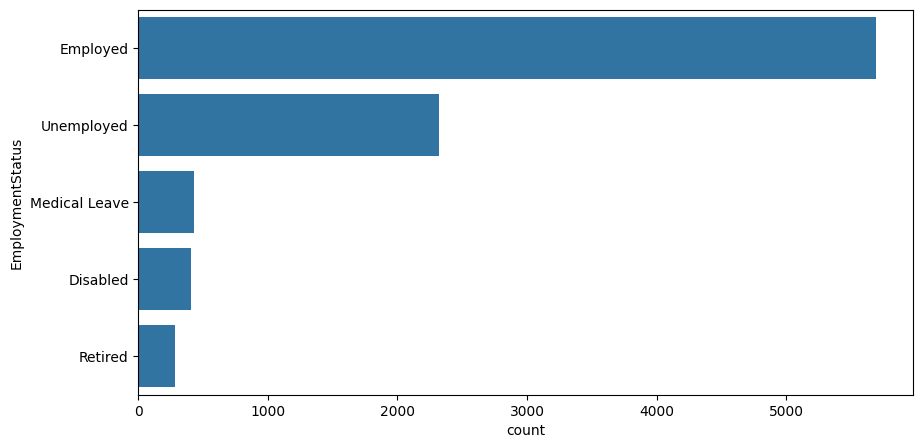

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data["EmploymentStatus"])
# plt.savefig("empstatus.png")
plt.show()

Most of the customers are employed which is conspicuous because they are more likely to afford the insurance than others.

In [ ]:
data["EmploymentStatus"].value_counts(normalize=True)*100

EmploymentStatus
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: proportion, dtype: float64

Around 62.38% of the customers are employed.

# ***LOCATION CODE***

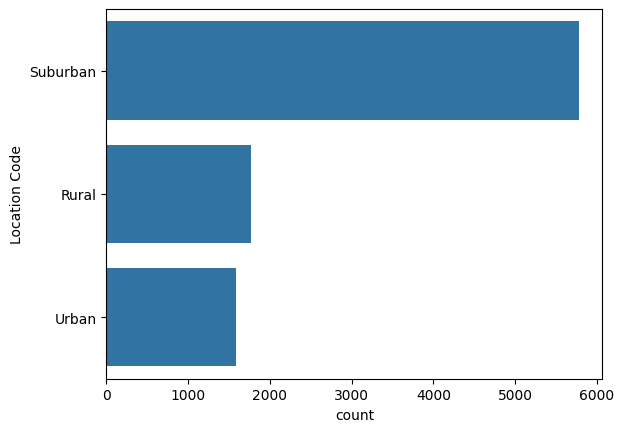

In [ ]:
sns.countplot(data["Location Code"])
plt.savefig("location.png")
plt.show()


Significant no. of customers are from sub-urban. There could be no. of reasons for there being less no. of customers from rural and urban like affordbility, accessibility, necessity etc.

***MARITAL STATUS***

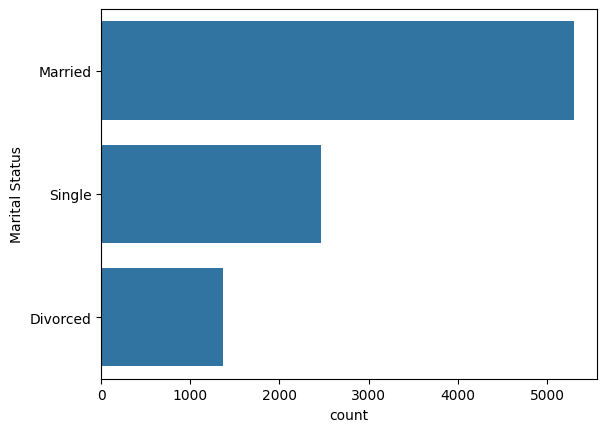

In [ ]:
sns.countplot(data["Marital Status"])
plt.show()

Most of the customers are married suugesting that married couple find insurance more beneficial than singles or divorcees. It could also mean that couples go more for insurances than individuals

# ***VEHICLE SIZE***

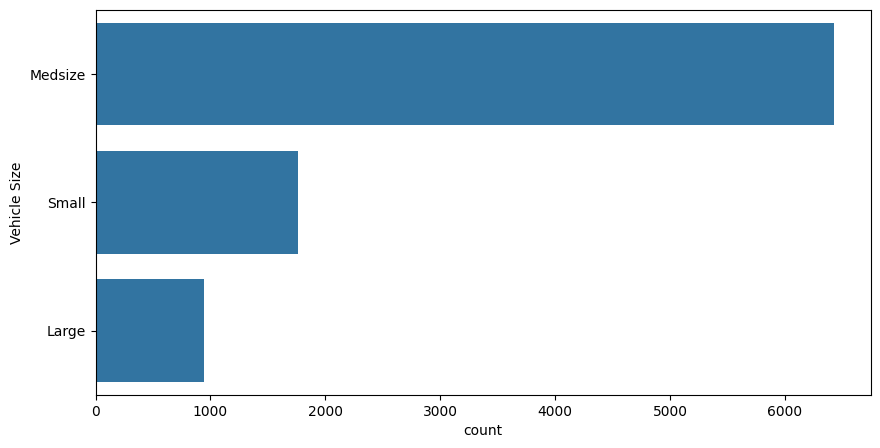

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data["Vehicle Size"])
plt.show()

Most of the customers have medium sized vehicle indicating that moderate size vehicles are preffered over other two.

# ***NO. OF OPEN COMPLAINTS***

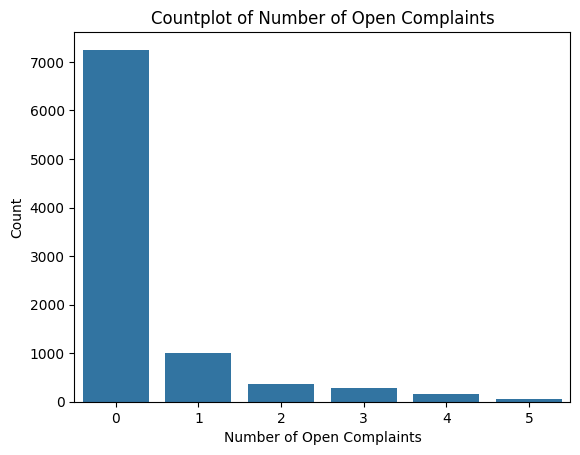

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x=data["Number of Open Complaints"]).set(title='Countplot of Number of Open Complaints', xlabel='Number of Open Complaints', ylabel='Count')
plt.figure(figsize=(10, 5))
plt.show()

High no. of open complaints suggests that significant no. of customers are satisfied with the services. This ia a positive feedback and indiactes that the company is working efficiently and should maintain that.


# ***NO. OF POLICIES***

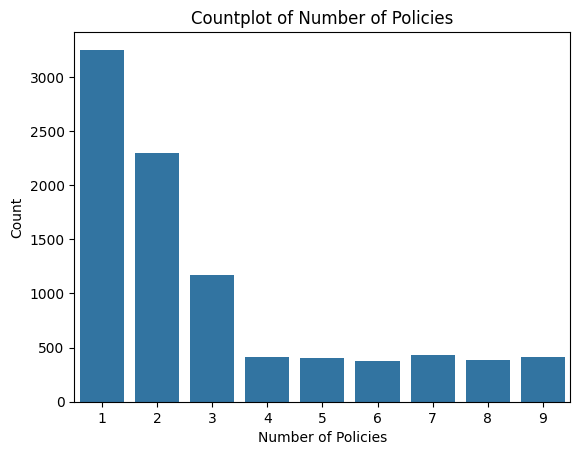

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.countplot(x=data["Number of Policies"]).set(title='Countplot of Number of Policies', xlabel='Number of Policies', ylabel='Count')
plt.figure(figsize=(10, 5))
plt.show()

# **Visualizing Correlation with Heatmap**

We create a heatmap to visualize the correlation between key features in the dataset, including 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', and 'Total Claim Amount'. This helps in understanding the relationships and interactions between these variables, which is crucial for feature selection and engineering in predictive modeling.

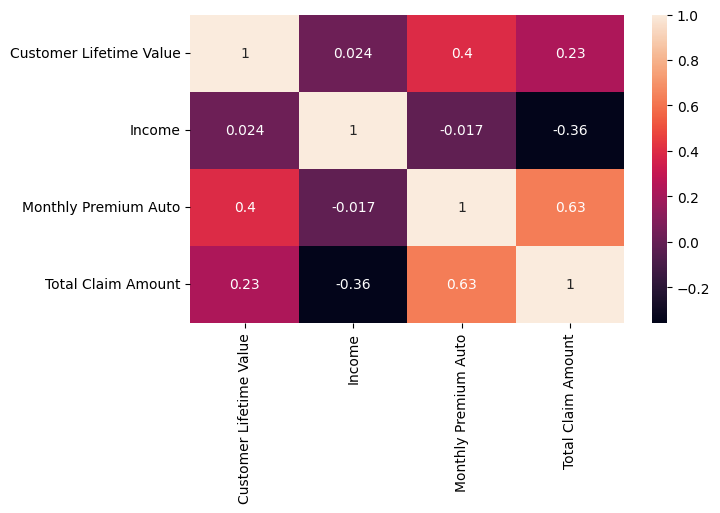

In [ ]:
heatmap = data[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto','Total Claim Amount']]
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

**bold text** Correlation Strength Matrix

| Variable 1                | Variable 2             | Correlation | Strength             |
|---------------------------|------------------------|-------------|----------------------|
| Customer Lifetime Value   | Income                 | 0.024       | Very Weak Positive   |
| Customer Lifetime Value   | Monthly Premium Auto   | 0.4         | Moderate Positive    |
| Customer Lifetime Value   | Total Claim Amount     | 0.23        | Weak Positive        |
| Income                    | Monthly Premium Auto   | -0.017      | Very Weak Negative   |
| Income                    | Total Claim Amount     | -0.36       | Moderate Negative    |
| Monthly Premium Auto      | Total Claim Amount     | 0.63        | Strong Positive      |

# **Analyzing the Effect of Income on Coverage**
We group the data by 'Coverage' and calculate the mean income for each group. Sorting these groups by their average income in descending order helps us understand if higher income levels are associated with specific coverage types.

In [ ]:
data.groupby(['Coverage'])[['Income']].mean().sort_values(by='Income',ascending=False)

,Income
Coverage,
Premium,38607.120146
Basic,38145.834770
Extended,36380.099927


Given the minimal difference in average income between customers with Premium and Basic policies, it makes sense to promote the Premium policy instead of the Basic policy during marketing. Since the financial gap is slight, offering the Premium policy could provide better value and coverage to customers without significantly affecting their budget.

# **Analyzing the Effect of Education on Income**

   The code groups data by 'Education' level, calculates the mean income for each group, and sorts the results in descending order of income.

In [ ]:
data.groupby(['Education'])[['Income']].mean().sort_values(by='Income',ascending=False)

,Income
Education,
Master,44768.187584
Doctor,42353.128655
Bachelor,37426.814774
College,37357.165983
High School or Below,35583.929443


The data indicates that individuals with a Master's degree or a doctorate degree have the highest average income. Those with Bachelor's degrees and College education have similar average incomes, while individuals with a high school education or less have the lowest average income. This suggests a positive correlation between education level and income, with higher education typically associated with higher earnings.

# **Analyzing the Effect of Coverage on Customer Lifetime Value**



We group the data by 'Coverage' and calculate the mean Customer Lifetime Value (CLV) for each coverage type. Sorting these groups by their average CLV in descending order helps us understand if certain coverage types are associated with higher CLV.

In [ ]:
data.groupby(['Coverage'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
Coverage,
Premium,10895.603083
Extended,8789.677608
Basic,7190.706422


This ranking reveals that customers with Premium coverage have the highest average CLV, followed by those with Extended and Basic coverage. This suggests that higher coverage types are associated with higher Customer Lifetime Value.









# **Analyzing the Effect of Education on Customer Lifetime Value**
We group the data by 'Education' and calculate the mean Customer Lifetime Value (CLV) for each education level. Sorting these groups by their average CLV in descending order helps us understand if higher education levels are associated with greater CLV.

In [ ]:
data.groupby(['Education'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
Education,
High School or Below,8296.709033
Master,8243.484692
Bachelor,7872.660412
College,7851.064644
Doctor,7520.344837


This ranking indicates that individuals with a high school education or less have the highest average CLV, followed by those with a Master’s degree, and those with higher education levels, such as Bachelor's, College, and Doctorate, have lower average CLV.

# **Analyzing the Effect of Marital Status on Customer Lifetime Value**
We group the data by 'Marital Status' and calculate the mean Customer Lifetime Value (CLV) for each status. Sorting these groups by their average CLV in descending order helps us determine if certain marital statuses are associated with higher CLV.

In [ ]:
data.groupby(['Marital Status'])[['Customer Lifetime Value']].mean().sort_values(by='Customer Lifetime Value',ascending=False)

,Customer Lifetime Value
Marital Status,
Divorced,8241.239135
Married,8078.966969
Single,7714.837018


This ranking reveals that individuals with a Divorced marital status have the highest average CLV, followed by those who are Married and then Single. This suggests that CLV is higher among divorced individuals compared to married and single individuals.

# **Data Preprocessing**

The code creates dummy variables for categorical columns, converts them to integers, and then concatenates these dummy variables with numerical columns into a single DataFrame.







In [ ]:
catg=pd.get_dummies(cat_cols,drop_first=True)
catg = catg.astype(int)
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,Response_Yes,Coverage_Extended,...,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,1,...,0,0,1,0,1,0,0,1,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,0,...,0,0,0,0,1,0,1,0,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,0,0,...,0,0,1,1,1,0,1,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0



# **Data Splitting and Log Transformation**
The code performs the following steps:

Prepare Data: It separates the features (X) from the target variable (y) and applies a log transformation to the target variable to normalize its distribution.
Split Data: The data is split into training and testing sets with 20% of the data reserved for testing using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['Customer Lifetime Value'],axis=1)
y=dfn['Customer Lifetime Value']
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7307, 25)
(7307,)
(1827, 25)
(1827,)


# **Preparing OLS Model and Performing Linear Regression Analysis**
The code renames the target column, adds a constant to the feature set, and fits an OLS linear regression model using statsmodels, then provides a summary of the model.


In [ ]:
import statsmodels.api as sm
dfn.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
#Adding a constant term to the feature set to include an intercept in the regression model.
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     70.80
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:37:27   Log-Likelihood:                -92848.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9108   BIC:                         1.859e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            126.1564    538.609      0.234      0.815    -929.637    1181.950
Income                            -0.0031      0.004     -0.794      0.427      -0.011       0.004
Monthly Premium Auto              83.2336      3.232     25.752      0.000      76.898      89.569
Months Since Last Claim            7.1123      6.562      1.084      0.278      -5.750      19.975
Months Since Policy Inception      0.4193      2.367      0.177      0.859      -4.221       5.060
Total Claim Amount                -0.4486      0.473     -0.948      0.343      -1.377       0.479
Number of Open Complaints       -234.6117     72.465     -3.238      0.001    -376.659     -92.564
Number of Policies                74.0378     27.608      2.682      0.007      19.921     128.155
Response_Yes                    -238.7564    200.381     -1.192      0.233    -631.548     154.036
Coverage_Extended               -135.5217    154.420     -0.878      0.380    -438.219     167.176
Coverage_Premium                -447.9994    260.140     -1.722      0.085    -957.932      61.934
Education_College                -12.7725    171.189     -0.075      0.941    -348.342     322.797
Education_Doctor                -323.1652    362.985     -0.890      0.373   -1034.698     388.368
Education_High School or Below   323.7580    173.123      1.870      0.062     -15.603     663.119
Education_Master                 112.3410    262.966      0.427      0.669    -403.131     627.813
EmploymentStatus_Employed        486.3138    353.929      1.374      0.169    -207.465    1180.093
EmploymentStatus_Medical Leave   150.2353    436.626      0.344      0.731    -705.650    1006.120
EmploymentStatus_Retired          28.9490    502.752      0.058      0.954    -956.558    1014.456
EmploymentStatus_Unemployed     -104.0409    357.705     -0.291      0.771    -805.223     597.141
Gender_M                        -181.4237    132.926     -1.365      0.172    -441.989      79.141
Location Code_Suburban           -22.8959    263.753     -0.087      0.931    -539.910     494.119
Location Code_Urban              201.1590    241.663      0.832      0.405    -272.554     674.872
Marital Status_Married          -304.5812    193.352     -1.575      0.115    -683.595      74.433
Marital Status_Single           -496.0929    225.780     -2.197      0.028    -938.672     -53.513
Vehicle Size_Medsize             305.2170    220.067      1.387      0.165    -126.163     736.597
Vehicle Size_Small               422.4321    256.144      1.649      0.099     -79.668     924.532
==============================================================================
Omnibus:                     5662.818   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (J

# Model Summary

Dependent Variable: Customer Lifetime Value (CLV)

R-squared: 0.163

This indicates that approximately 16.3% of the variability in CLV can be explained by the model. While this shows that the model captures some of the variance, a substantial portion remains unaccounted for by these predictors.

Adjusted R-squared: 0.160

This value adjusts the R-squared for the number of predictors in the model, providing a slightly more accurate measure of the model's explanatory power.

F-statistic: 70.80 (p-value: 0.00)

The model is statistically significant, suggesting that the predictors, as a whole, significantly explain variations in CLV.

# Key Findings


Intercept (const): 126.1564

This represents the baseline value of CLV when all predictors are zero. Given the presence of dummy variables, this value isn't particularly meaningful.

# Significant Predictors

Monthly Premium Auto



Number of Policies


Marital Status (Single)



Coverage (Premium)


Education (High School or Below)


Vehicle Size (Small)


# Non-Significant Predictors

Many variables, including Total Claim Amount, Income, Response, Coverage, Employment Status, Gender, Location Code, and some educational categories, do not significantly impact CLV.


# Model Diagnostics

Omnibus: 5,662.818 (p-value: 0.000) indicating non-normality of residuals.

Jarque-Bera (JB): 64,655.913 (p-value: 0.00) confirming non-normality of residuals.

Durbin-Watson: 1.996 suggesting no significant autocorrelation.

Condition Number: 5.69e+05 indicating potential multicollinearity issues.

# Conclusion
The model explains only a small portion of the variance in CLV, suggesting that other important predictors are not included. Significant variables like Monthly Premium Auto and Number of Policies contribute to the model, but many other variables did not show a significant impact. The high condition number suggests possible multicollinearity, which could affect the stability and interpretation of the coefficients. The non-normality of residuals indicates potential issues that need to be addressed to improve the model's accuracy. Further refinement and the inclusion of additional relevant variables could enhance the model's predictive power.








# **Assumptions**

# 1. No Auto Correlation

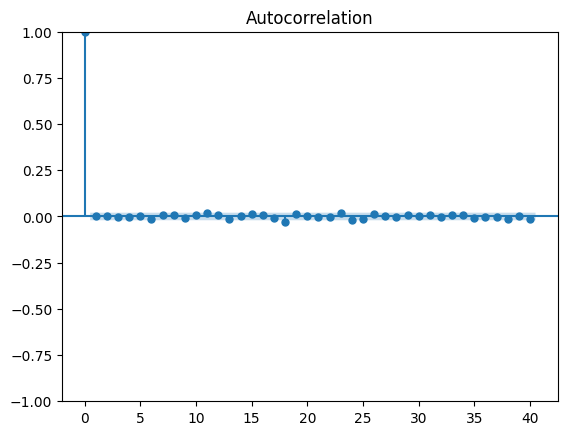

In [ ]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

The autocorrelation function (ACF) plot displays a gradual pattern without significant spikes, indicating the absence of autocorrelation in the residuals.








# 2. Normality of error terms

In [ ]:
#H0: the error terms are normally distributed
#dof for residuals is n-2
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=64655.91345212555, pvalue=0.0)


The computed Jarque-Bera statistic of 65,051.11 exceeds the critical chi-square value of 5.99 at the 5% level of significance. Thus, we reject the null hypothesis, indicating that the error terms are not normally distributed.

<ipython-input-106-4a6e8f97f4aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg.resid)


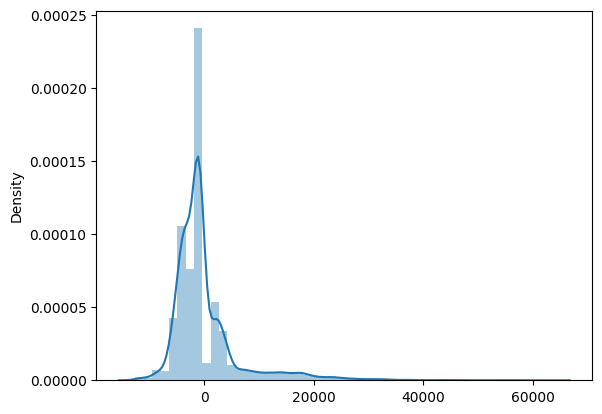

In [ ]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed.

***linearity of residuals***

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model


(1.0145668313594374, 0.31280990617177984)

*  H0:The data is linear
*   pvalue > 0.05 failed to reject H0  so residuals are normally distributed










In [ ]:
lin_reg.resid.mean()

1.6754234643199916e-09

# No Heteroscedacity

In [ ]:
import statsmodels.stats.api as sms
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.229670689192259, 1.7082280340109503e-12, 'increasing')

A p-value below a certain threshold (0.05) suggests that we should reject the null hypothesis in favor of heteroscedasticity.








# no strong multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif}, index=X_constant.columns)

NameError: name 'X_constant' is not defined

The high Variance Inflation Factor (VIF) values in the 'Policy' and 'Policy Type' columns, along with their lack of statistical significance in predicting the target variable, suggest that these variables can be removed from the model.








# **Linear** Regression Model Fitting

The code fits a Linear Regression model to the training data and prints the R² scores for both the training and testing sets to assess the model's performance.








In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.24475374486823454
R^2 score for test: 0.2442519806277884


The R² scores for the training set (0.2448) and the testing set (0.2443) are quite similar, indicating that the model has consistent performance across both sets. However, the relatively low R² values suggest that the model explains only about 24% of the variance in the target variable, implying that there may be other factors influencing the Customer Lifetime Value that are not captured by the current model.R² values decreae slightly from training to testing data it shows negligible amount of overfitting

### **Evaluating Model Performance Metrics**
The code predicts the target values for the test set and imports metrics to evaluate performance, including mean squared error, R² score, and mean absolute error.








In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.5784785186071706
MAE 0.45033553145451394
R-squared: 0.2442519806277884


The RMSE and MAE values indicate that the model has a moderate level of prediction error, with errors being more pronounced in RMSE compared to MAE. The R² score of 0.2443 shows that the model explains approximately 24% of the variance in the target variable.

# **Feature Selection by Recursive Backward Elimination**

The code iteratively removes features with p-values above 0.05 from the model, retaining only statistically significant features and printing the final list of selected features.

In [ ]:
#Feature Selection by Recursive Backward Elimination

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'EmploymentStatus_Employed', 'Marital Status_Single']


In [ ]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'EmploymentStatus_Employed', 'Marital Status_Single']]

The selected features, based on p-values below 0.05, are:

**Monthly Premium Auto**

**Number of Open Complaints**

**Number of Policies**

**EmploymentStatus_Employed**

**Marital Status_Single**

These features are considered statistically significant and should be used in the final model for better predictive performance.

# **Final Model Using Selected Features**

The code fits an OLS model with the selected features and provides a detailed summary of the model's performance and feature significance.

In [ ]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     349.5
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:37:30   Log-Likelihood:                -92859.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9128   BIC:                         1.858e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       270.0085    236.027      1.144      0.253    -192.657     732.674
Monthly Premium Auto         79.1546      1.915     41.328      0.000      75.400      82.909
Number of Open Complaints  -238.1315     72.384     -3.290      0.001    -380.019     -96.243
Number of Policies           75.7862     27.567      2.749      0.006      21.749     129.824
EmploymentStatus_Employed   489.7996    142.787      3.430      0.001     209.905     769.695
Marital Status_Single      -305.8626    155.786     -1.963      0.050    -611.238      -0.487
==============================================================================
Omnibus:                     5678.653   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65109.207
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      14.764   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""